# Datos Faltantes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [3]:
data.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011011,0.069338,94.0
329,-0.012780,0.050680,-0.055785,-0.002228,-0.027712,-0.029184,0.019187,-0.039493,-0.017056,0.044485,135.0
84,0.001751,-0.044642,-0.039618,-0.100934,-0.029088,-0.030124,0.044958,-0.050195,-0.068332,-0.129483,65.0
308,0.001751,-0.044642,-0.046085,-0.033213,-0.073119,-0.081480,0.044958,-0.069383,-0.061176,-0.079778,114.0
289,-0.074533,0.050680,0.055229,-0.040099,0.053469,0.053174,-0.043401,0.071210,0.061238,-0.034215,68.0


In [4]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [5]:
# Observar el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     398 non-null    float64
 3   bp      398 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
# Desplegar la lista de columnas con sus valores faltantes
data.isna().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [7]:
# Ejemplo usando SimpleImputer para la imputación simple con valor promedio.
mean_data = data.copy() # Copiar dataset para no alterar el original
simp_imp = SimpleImputer(strategy='mean') # Instancia y configura la estrategia
mean_data['bmi'] = simp_imp.fit_transform(mean_data[['bmi']]) # Imputar solo la columna 'bmi'

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [9]:
# Ejemplo usando KNNImputer
knn_data = data.copy() # Creamos copia para poder comparar posteriormente
imputer = KNNImputer(n_neighbors=5, weights = 'distance') # el peso 'distance' para que los valores más cercanos influyan más
knn_data[['bmi','bp']]= imputer.fit_transform(knn_data[['bmi','bp']])

### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

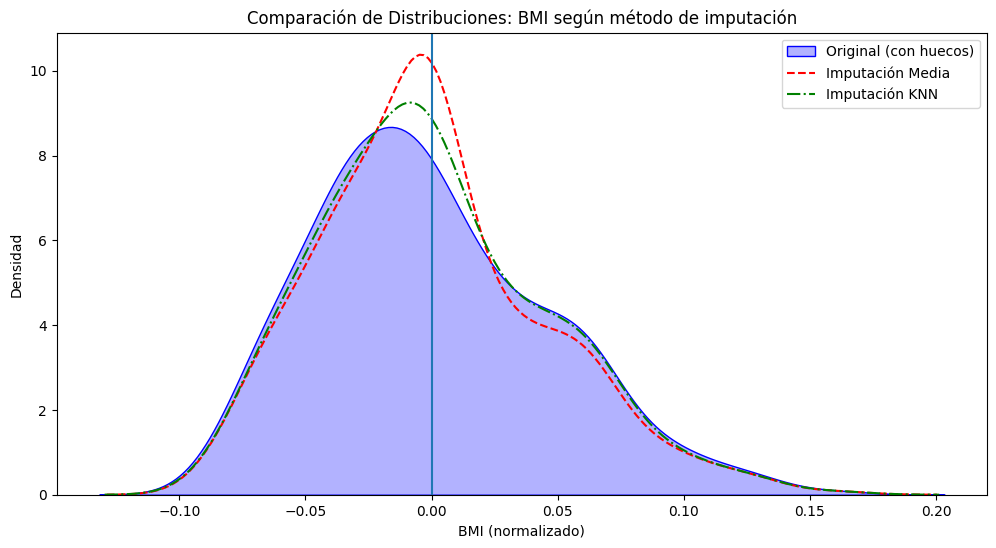

In [18]:
plt.figure(figsize=(12, 6))

# Histogramas superpuestos
sns.kdeplot(data['bmi'].dropna(), label='Original (con huecos)', fill=True, color="blue", alpha=0.3)
sns.kdeplot(mean_data['bmi'], label='Imputación Media', color="red", linestyle="--")
sns.kdeplot(knn_data['bmi'], label='Imputación KNN', color="green", linestyle="-.")

plt.title('Comparación de Distribuciones: BMI según método de imputación')
plt.xlabel('BMI (normalizado)')
plt.ylabel('Densidad')
plt.axvline(0)
plt.legend()
plt.show()

### Comentarios:

1. Se observa una clara desviación de los datos normalizados, con la imputación media.
2. A diferencia, el KNNImputer busca los k registros más similares (vecinos) y calcula el valor faltante basándose en ellos, lo que preserva mejor las relaciones entre las variables.